In [1]:
import sys
sys.path.append("../src")

from dataset import ImageDataset, TRANSFORM

import matplotlib.pyplot as plt
import numpy as np

import torch
from torch.utils.data import DataLoader

from skimage.segmentation import slic, mark_boundaries

DATA_DIR = "../imagenette"
DATA_FILE = "noisy_imagenette.csv"

MODEL_DIR = "../models"
MODEL_FILE = "resnet_state_dict.pth"

In [2]:
train_dataset = ImageDataset(DATA_DIR, DATA_FILE, TRANSFORM, False)
val_dataset = ImageDataset(DATA_DIR, DATA_FILE, TRANSFORM, True)
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# SLIC

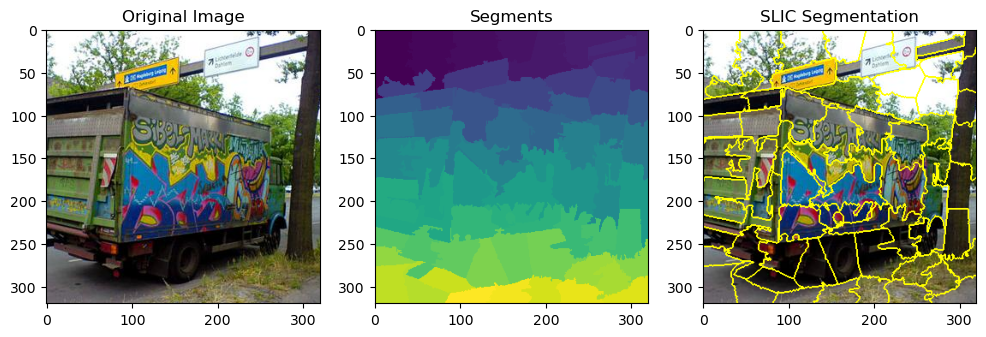

In [3]:
toy_image, toy_label_vec = train_dataset[1500]

toy_image = toy_image.numpy()
toy_label = torch.argmax(toy_label_vec).item()

segments = slic(np.transpose(toy_image, (1, 2, 0)), n_segments=80, compactness=20)
boundaries = mark_boundaries(np.transpose(toy_image, (1, 2, 0)), segments)


fig, ax = plt.subplots(1, 3, figsize=(12, 6))

ax[0].imshow(np.transpose(toy_image, (1, 2, 0)))
ax[0].set_title('Original Image')

ax[1].imshow(segments)
ax[1].set_title('Segments')

ax[2].imshow(boundaries)
ax[2].set_title('SLIC Segmentation')

plt.show()